In [12]:
#nama : Julio Victorio Sibarani
#email : julio_sibarani@yahoo.co.id
#domisili : Medan, Sumatera Utara
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
!wget command: https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-10-31 09:01:11--  ftp://command/
           => ‘.listing’
Resolving command (command)... failed: Name or service not known.
wget: unable to resolve host address ‘command’
--2020-10-31 09:01:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  14.8MB/s    in 21s     

2020-10-31 09:01:32 (14.9 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]

FINISHED --2020-10-31 09:01:32--
Total wall clock time: 21s
Downloaded: 1 files, 308M in 21s (14.9 MB/s)


In [6]:
#Doing extration to the xip file
import zipfile
import os
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [7]:
base_dir = '/content/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['paper', 'rock', 'README_rpc-cv-images.txt', 'scissors']

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.4,
    fill_mode='wrap',
    validation_split=0.4
)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.4,
                    fill_mode = 'nearest',
                    validation_split=0.4
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100,100),
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100,100),
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')                                   
])

model.compile(loss='categorical_crossentropy', 
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(
    train_generator,
    steps_per_epoch=15,  
    epochs=15,
    validation_data=validation_generator, 
    validation_steps=4, 
    verbose=2
)

Epoch 1/15
15/15 - 7s - loss: 1.1697 - accuracy: 0.4500 - val_loss: 0.9150 - val_accuracy: 0.8281
Epoch 2/15
15/15 - 7s - loss: 0.7299 - accuracy: 0.7083 - val_loss: 0.5452 - val_accuracy: 0.8047
Epoch 3/15
15/15 - 7s - loss: 0.4632 - accuracy: 0.8313 - val_loss: 0.4824 - val_accuracy: 0.7812
Epoch 4/15
15/15 - 7s - loss: 0.3122 - accuracy: 0.8896 - val_loss: 0.2608 - val_accuracy: 0.9297
Epoch 5/15
15/15 - 7s - loss: 0.2455 - accuracy: 0.9208 - val_loss: 0.3974 - val_accuracy: 0.8672
Epoch 6/15
15/15 - 7s - loss: 0.2781 - accuracy: 0.8938 - val_loss: 0.1800 - val_accuracy: 0.9531
Epoch 7/15
15/15 - 6s - loss: 0.2380 - accuracy: 0.9222 - val_loss: 0.2248 - val_accuracy: 0.9219
Epoch 8/15
15/15 - 7s - loss: 0.1622 - accuracy: 0.9479 - val_loss: 0.2759 - val_accuracy: 0.9297
Epoch 9/15
15/15 - 6s - loss: 0.4282 - accuracy: 0.8244 - val_loss: 0.4528 - val_accuracy: 0.8203
Epoch 10/15
15/15 - 6s - loss: 0.3987 - accuracy: 0.8644 - val_loss: 0.4406 - val_accuracy: 0.8125
Epoch 11/15
15/15 -

Saving 1CXgK9fgGdSRggD9.png to 1CXgK9fgGdSRggD9.png
1CXgK9fgGdSRggD9.png
scissors


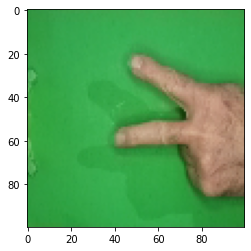

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for a in uploaded.keys():

  #predicting images
  place = a
  pict = image.load_img(place, target_size=(100,100))
  imgplot = plt.imshow(pict)
  Y = image.img_to_array(pict)
  Y = np.expand_dims(Y, axis=0)

  picture = np.vstack([Y])
  categories = model.predict(picture, batch_size=10)

  print(a)
  if categories[0][0]==1:
    print('paper')
  elif categories[0][1]==1:
    print('rock')
  elif categories[0][2]==1:
    print('scissors')
  else:
    print('out of criteria')

